In [1]:
import os
HOME = os.getcwd()

In [13]:
!pip install ultralytics

from IPython import display
display.clear_output()
! yolo checks

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.00GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.2>=1.4.1
torch               ✅ 2.0.1+cu118>=1.8.0
torchvision         ✅ 0.15.2+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
WARNING ⚠️ invalid check_version(5.9.5, ) requested, please check values.
psutil              ✅ 5.9.5
WARNING ⚠️ invalid check_version(9.0.0, ) requested, please check values.
py

In [15]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="g8CZp8TUYZuRZXT7MKaT")
project = rf.workspace("technische-universitt-chemnitz").project("lane-traffic_signs")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.184, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to lane&traffic_signs-3 in yolov8:: 100%|██████████| 258/258 [00:00<00:00, 3715.12it/s]


In [5]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/data.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz

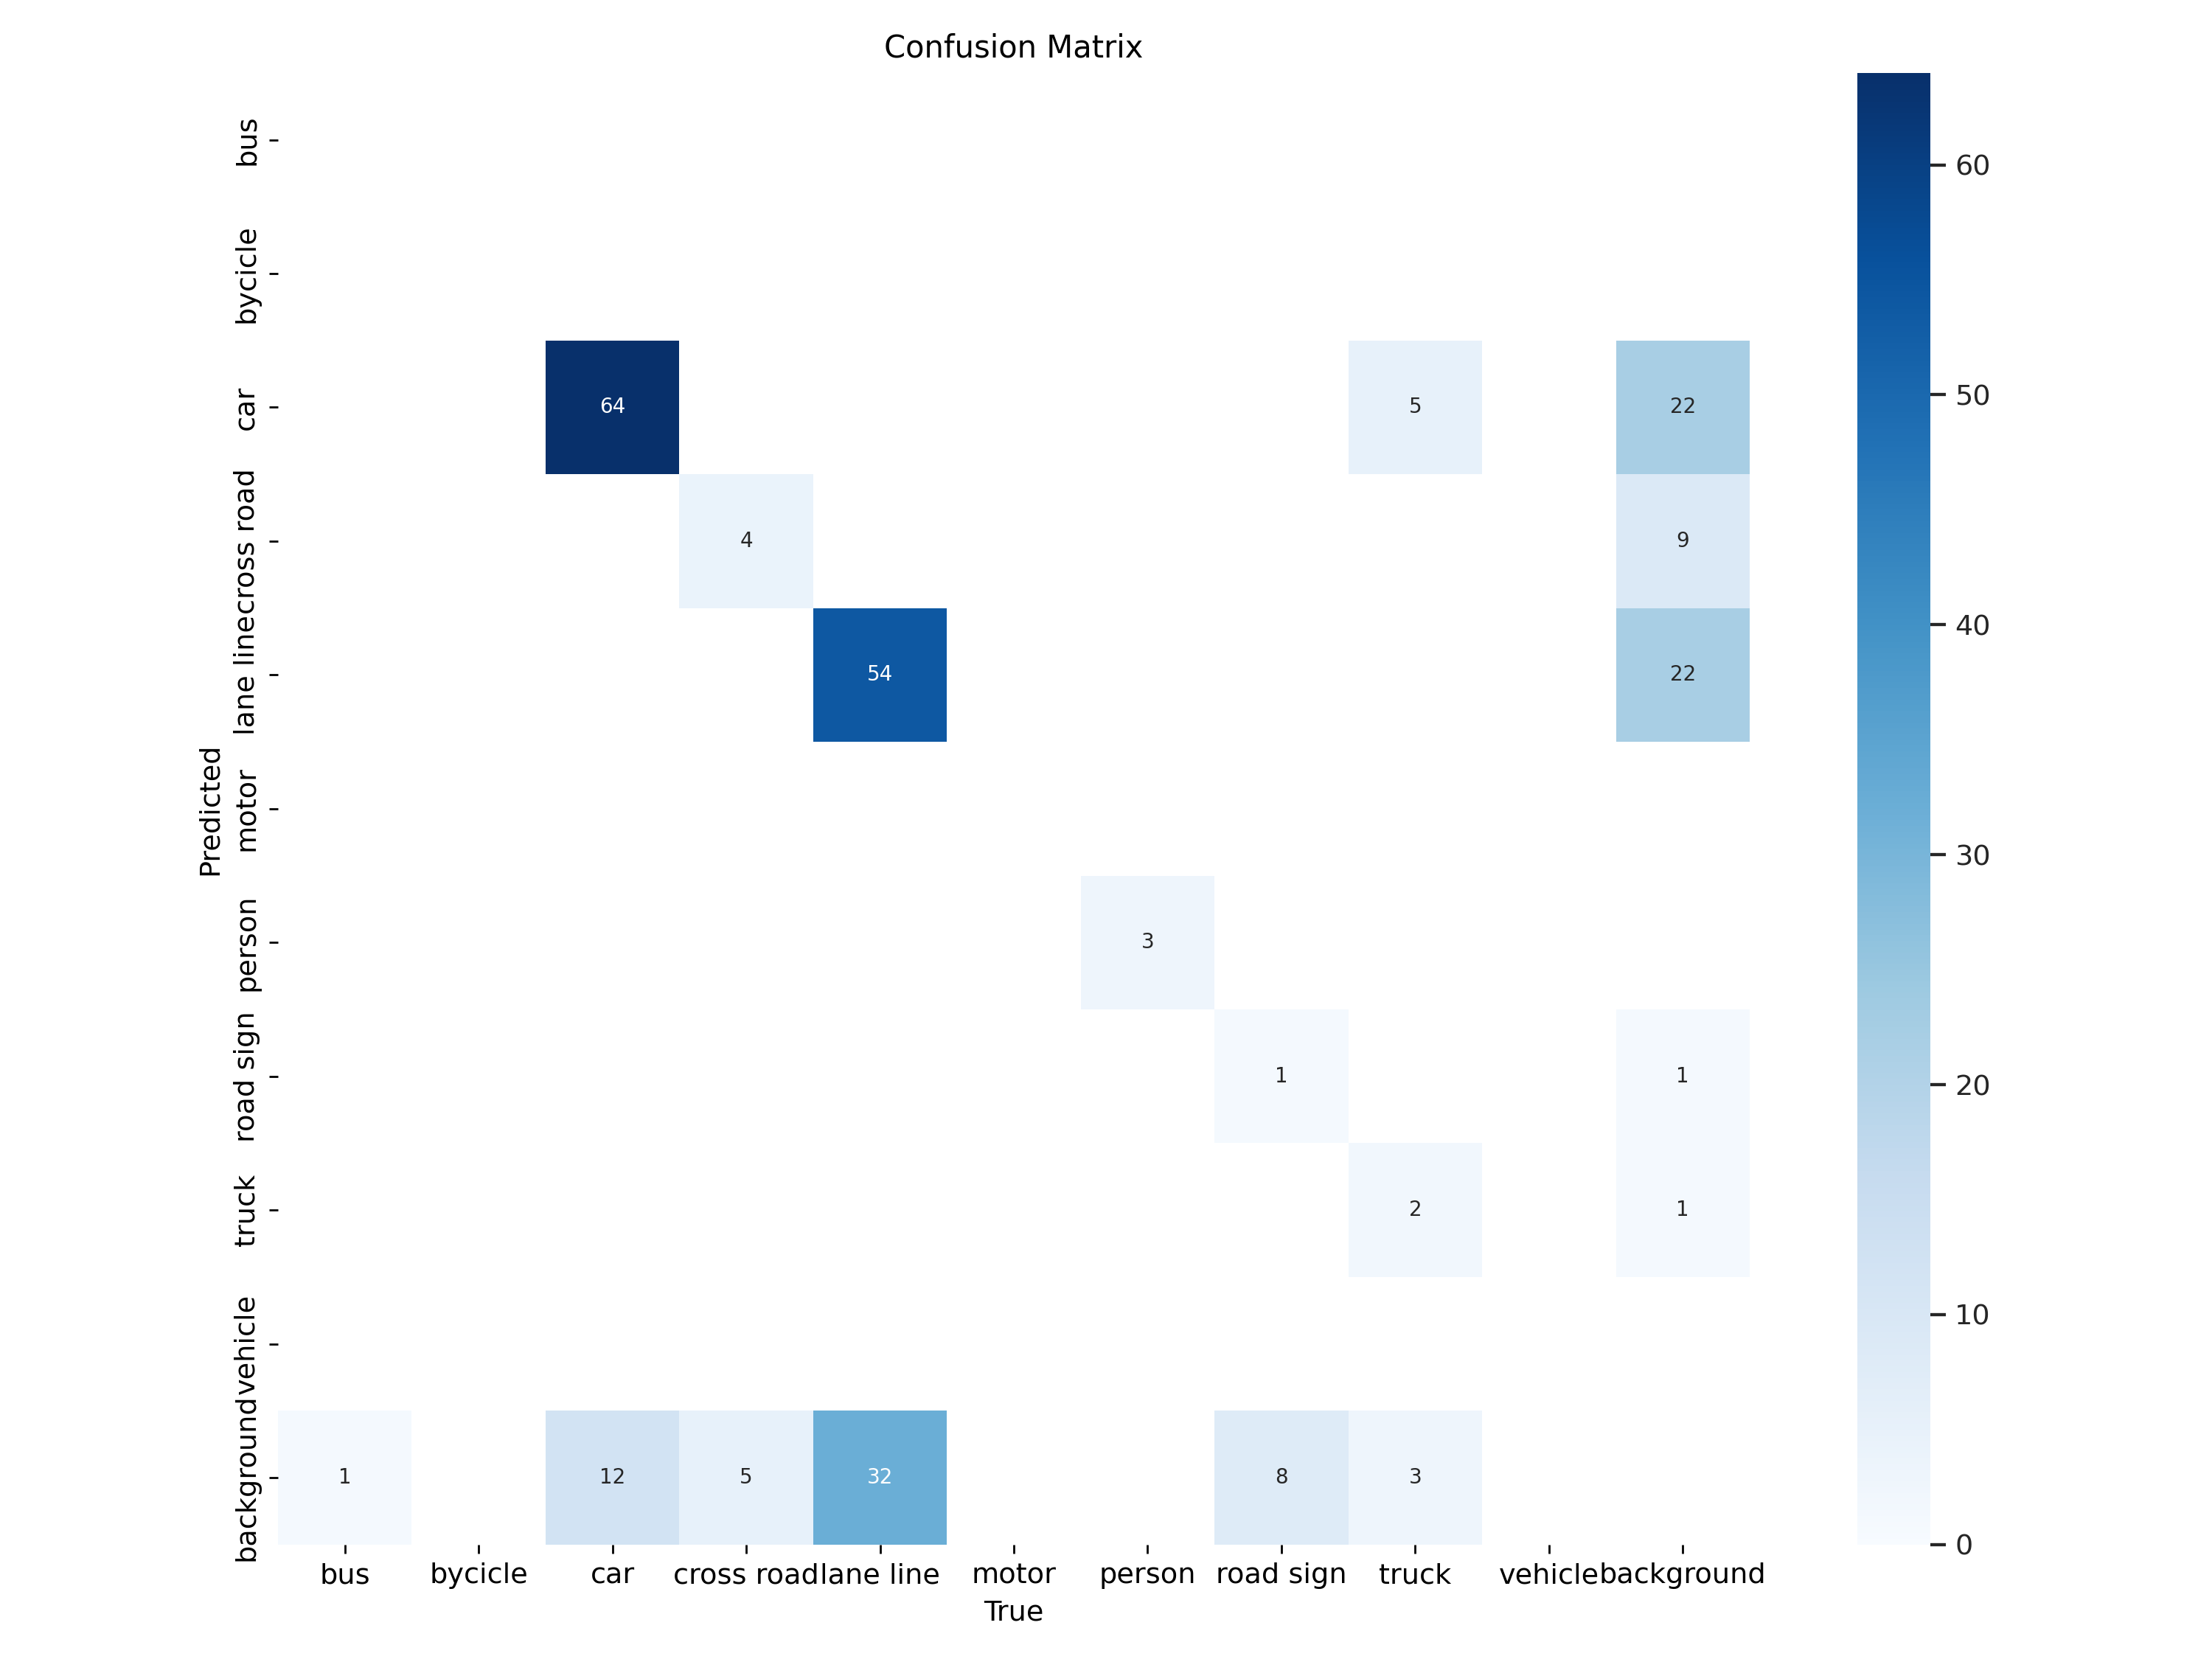

In [7]:
Image(filename='/content/runs/segment/train2/confusion_matrix.png', width=600)

In [10]:
!yolo task=segment mode=predict model=/content/runs/segment/train2/weights/best.pt conf=0.25 source=/content/test/images

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients

image 1/21 /content/test/images/00510_jpg.rf.17e680ae5e05fbfe09ed977a02c0b6ec.jpg: 640x640 2 cars, 3 lane lines, 30.4ms
image 2/21 /content/test/images/00540_jpg.rf.e4ce58d8f940c53d9f91db4c7967b07a.jpg: 640x640 2 cars, 5 lane lines, 30.7ms
image 3/21 /content/test/images/00960_jpg.rf.1e846de4cff7cf84e1d7467786bdce23.jpg: 640x640 3 lane lines, 22.4ms
image 4/21 /content/test/images/04770_jpg.rf.156ea81d95e483c8845f858c032b394d.jpg: 640x640 1 car, 2 lane lines, 1 truck, 21.0ms
image 5/21 /content/test/images/0a2420d5-8846-46b8-b512-527bdf27da0e-mov-0001_jpg.rf.bed264fc5d1dc963e2074a5ba282ed2c.jpg: 640x640 1 car, 8 lane lines, 21.0ms
image 6/21 /content/test/images/0a5ac9f0-338e-496c-9e64-409e862a18ab-mov-0001_jpg.rf.064a0f735a73cdcb0dcc390373d223d9.jpg: 640x640 12 cars, 2 cross roads, 2 lane lines, 1 road sign, 21.0ms
image 7/2

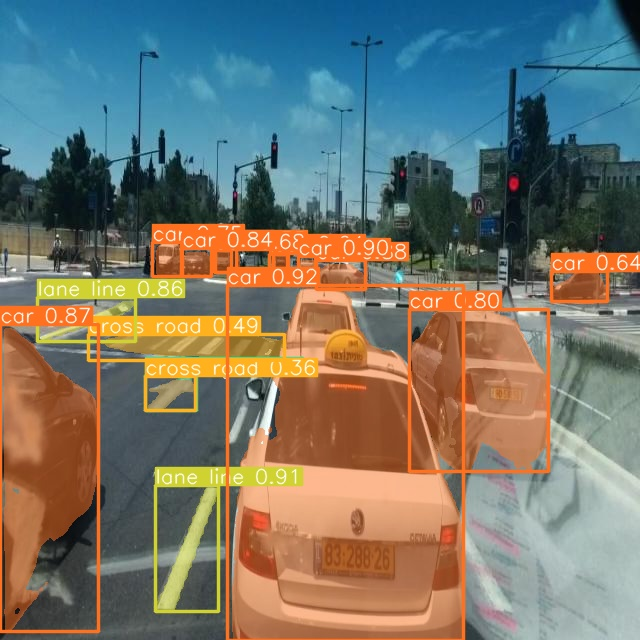

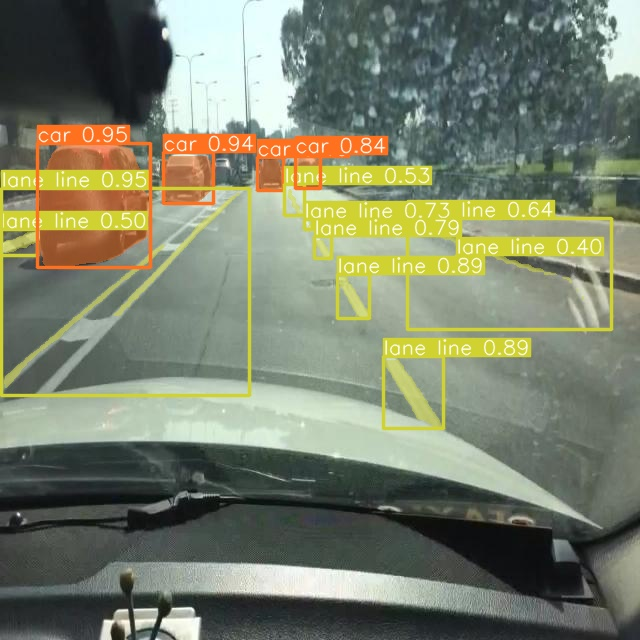

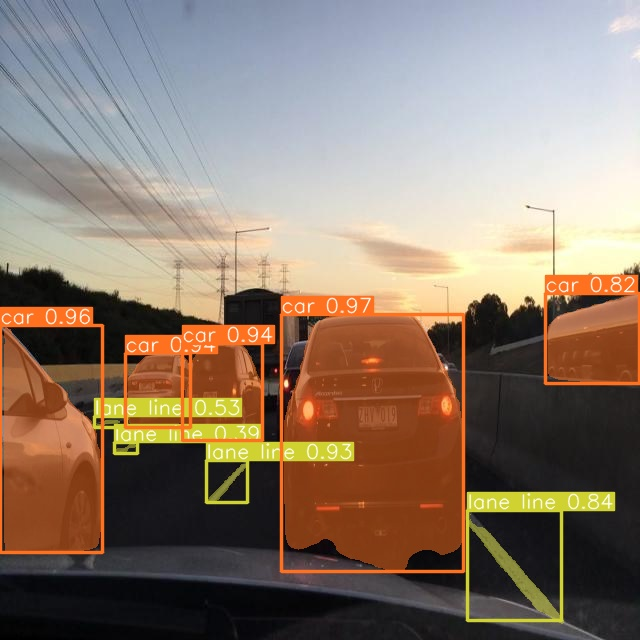

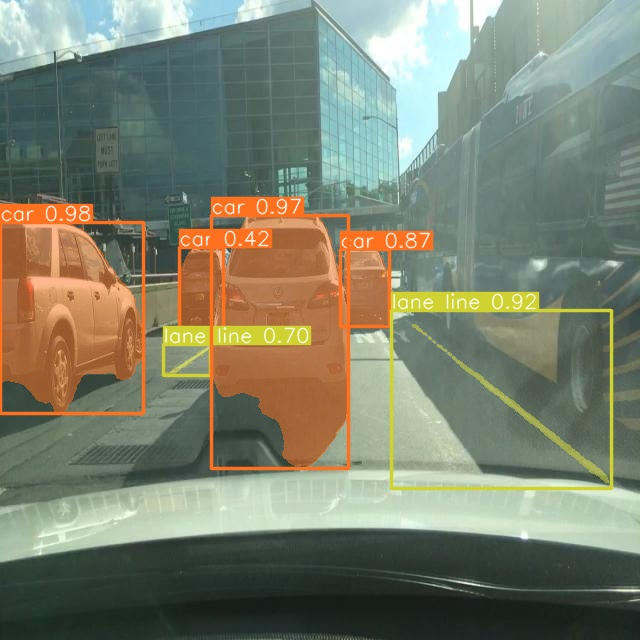

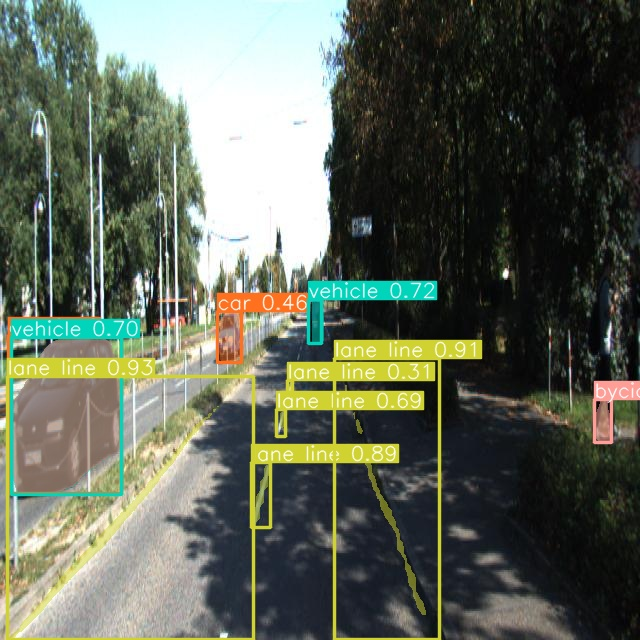

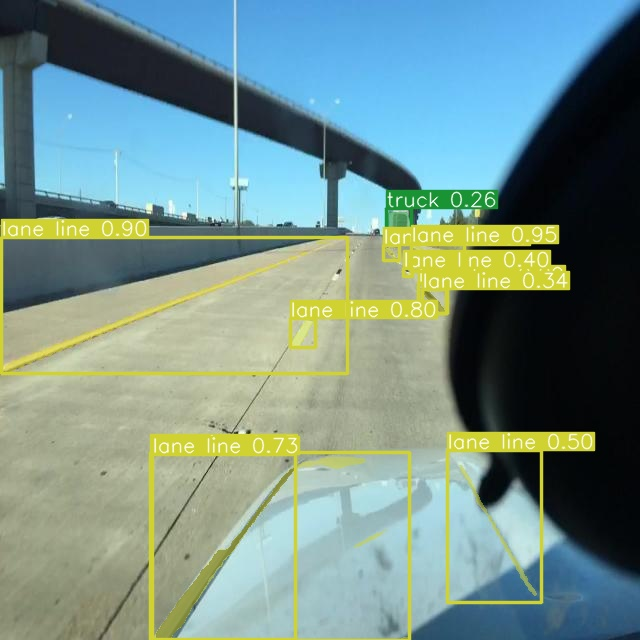

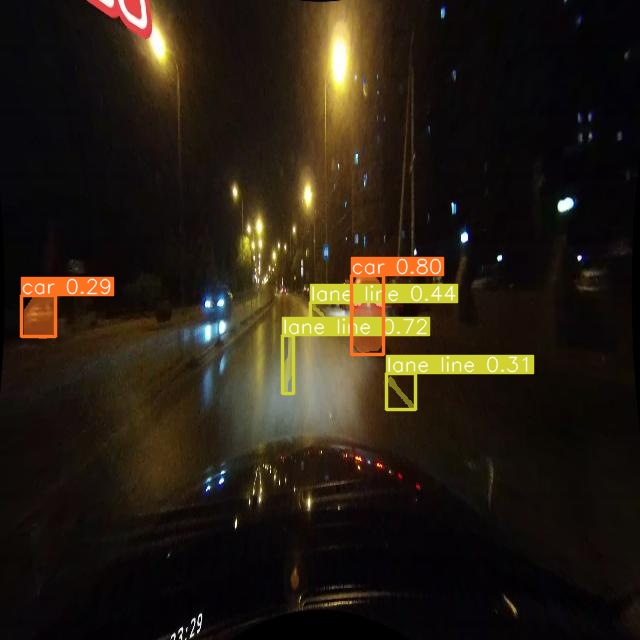

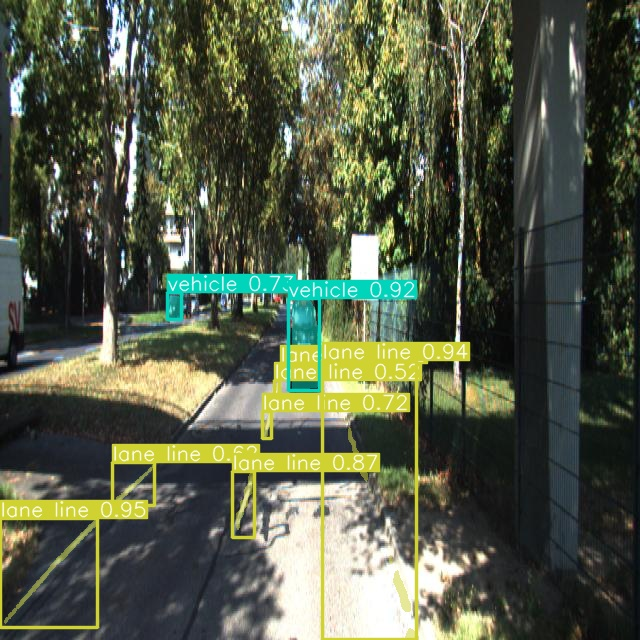

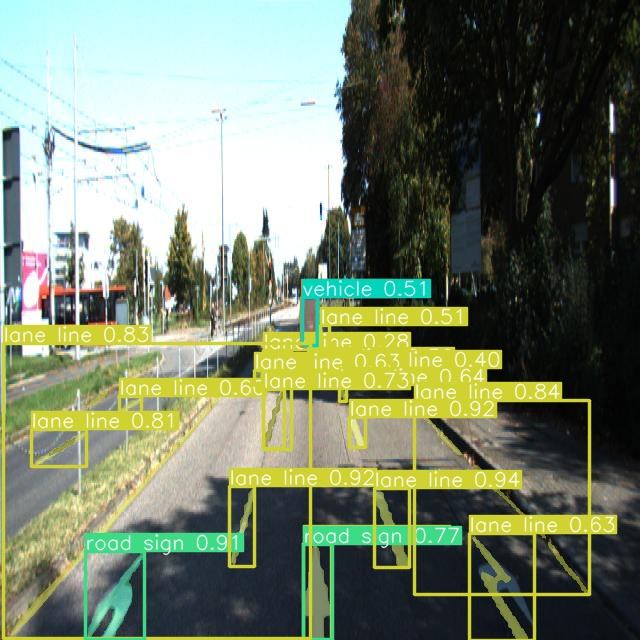

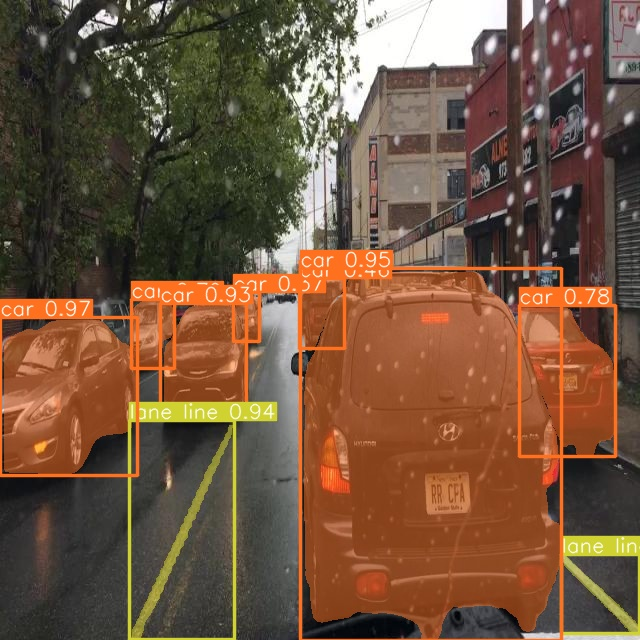

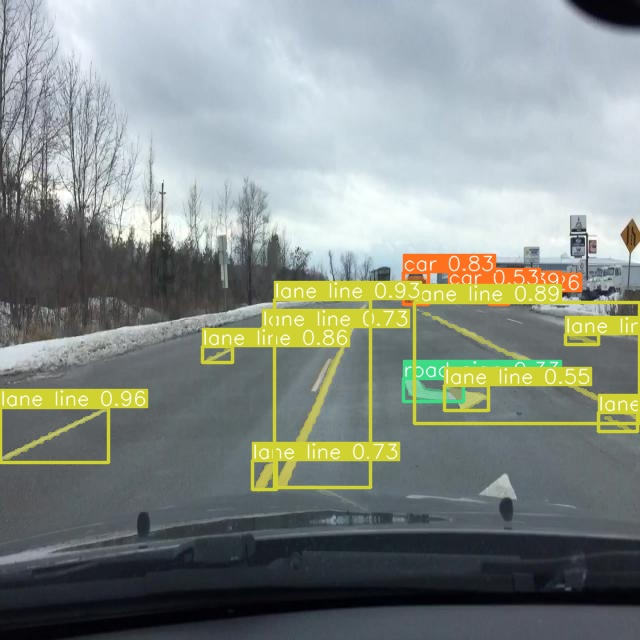

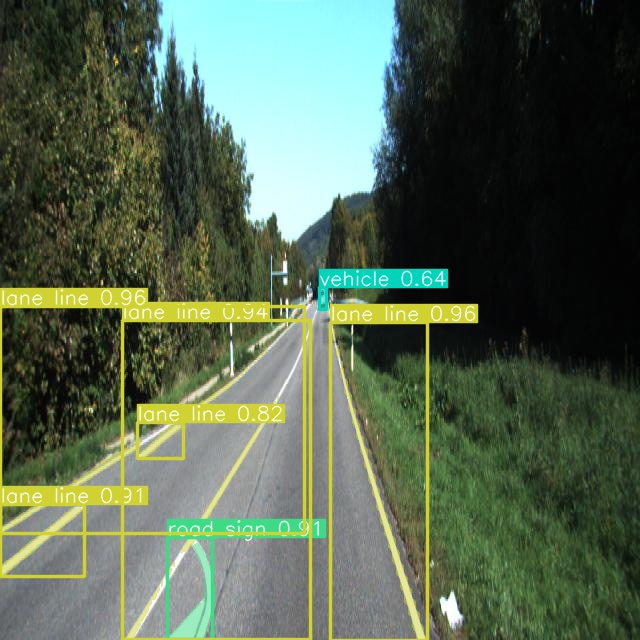

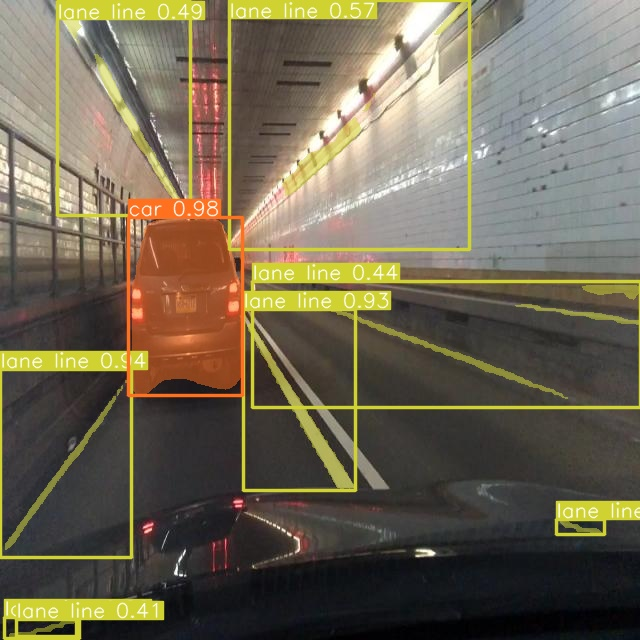

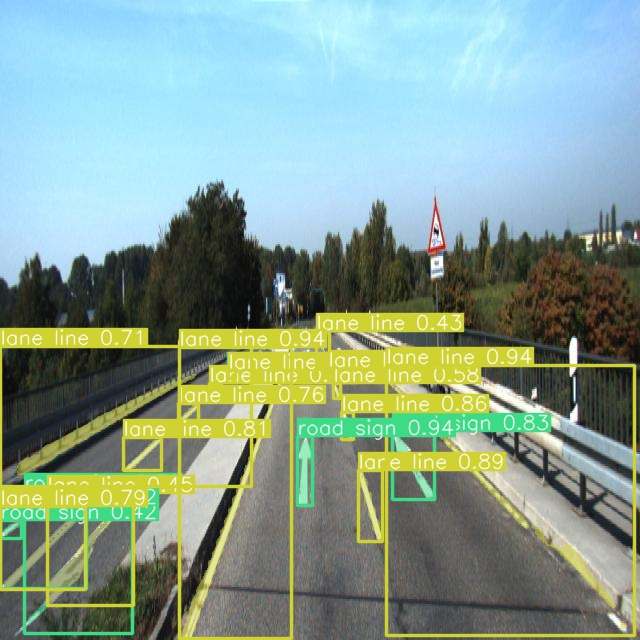

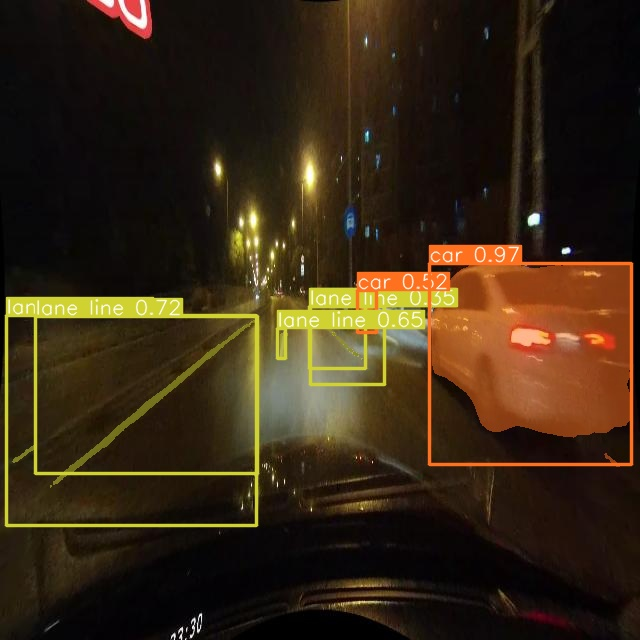

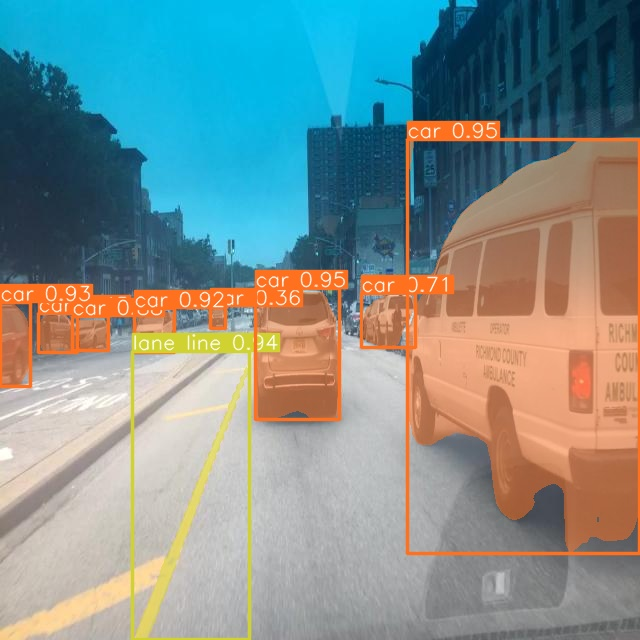

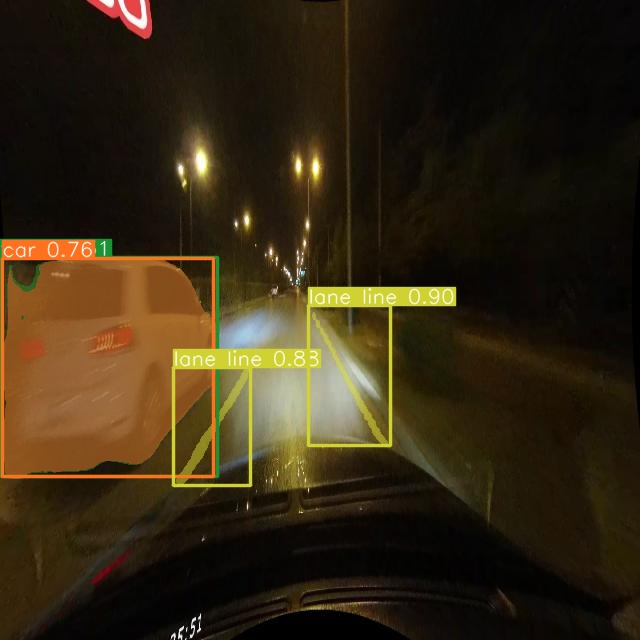

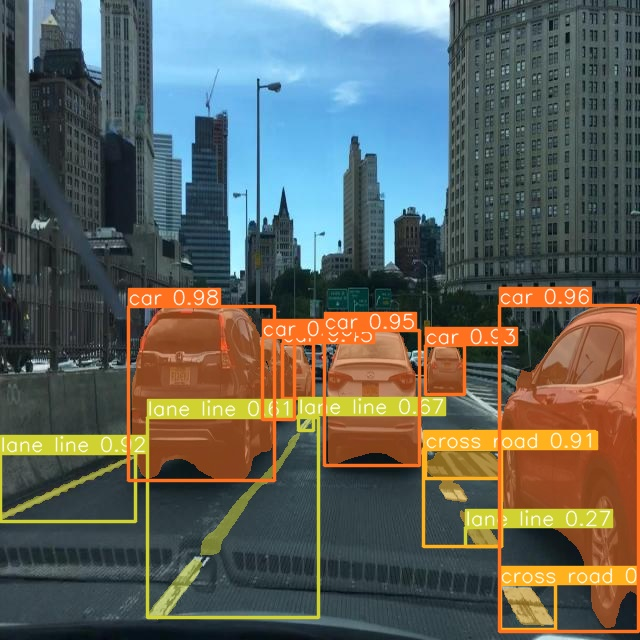

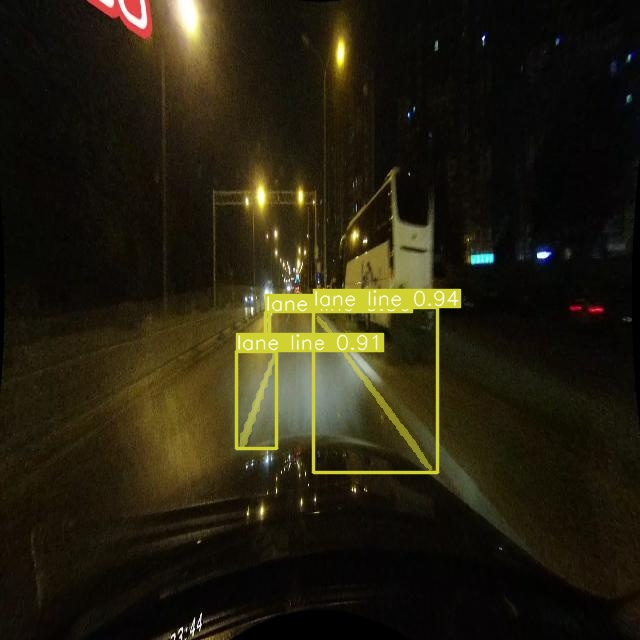

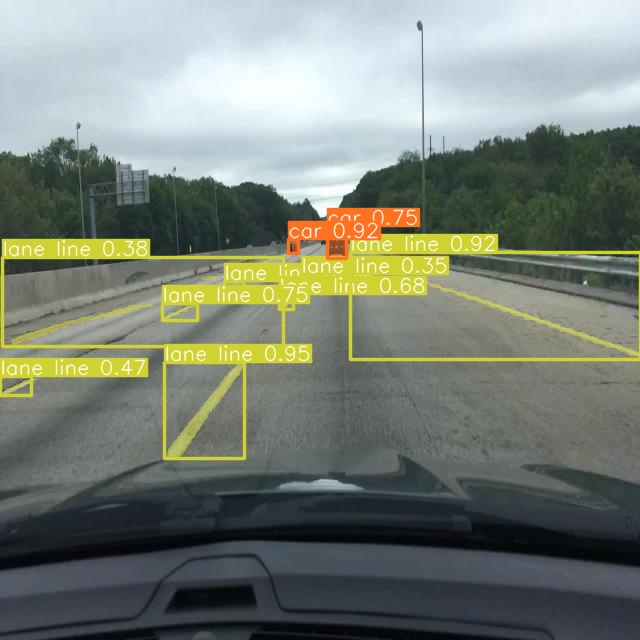

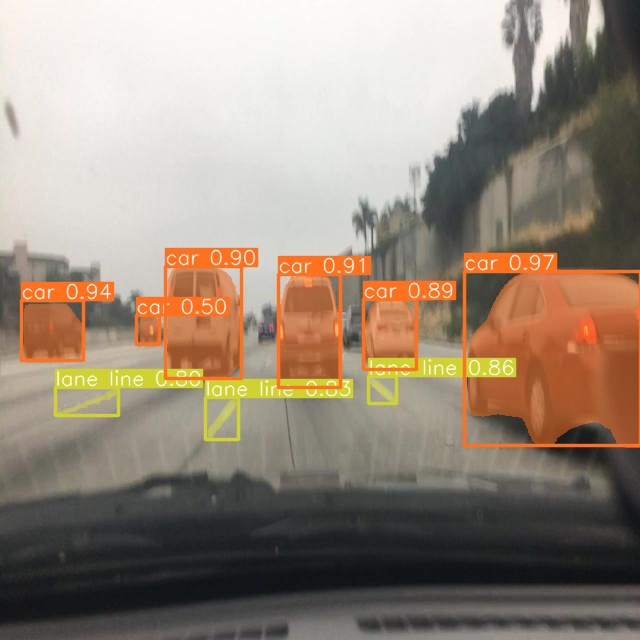

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print('\n')